════════════════════════════════════════════════════════════════════════════════
🚀 INICIANDO PIPELINE ETL CON ARQUITECTURA MEDALLION
════════════════════════════════════════════════════════════════════════════════

📦 Instalando dependencias necesarias...
✅ Dependencias instaladas correctamente

📚 Importando librerías...
✅ Librerías importadas correctamente

⚙️  CONFIGURACIÓN DEL PIPELINE

📁 Estructura de directorios creada:
   ├── 🥉 Bronze: /content/etl_project/data/bronze
   ├── 🥈 Silver: /content/etl_project/data/silver
   ├── 🥇 Gold: /content/etl_project/data/gold
   ├── 📝 Logs: /content/etl_project/logs
   └── 📊 Visualizations: /content/etl_project/visualizations

✅ Sistema de logging configurado

🥉 FASE 1: EXTRACCIÓN DE DATOS (BRONZE LAYER)


📋 Primeras 5 filas del dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

🔍 ANÁLISIS EXPLORATORIO DE DATOS CRUDOS




📈 Estadísticas Descriptivas:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



🔍 Valores Nulos por Columna:


,Nulos,Porcentaje
Description,1454,0.27
CustomerID,135080,24.93



🥈 FASE 2: TRANSFORMACIÓN Y LIMPIEZA (SILVER LAYER)


📋 Primeras 5 filas después de limpieza:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,YearMonth,DayOfWeek,DayName,Hour,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12,2,Wednesday,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2,Wednesday,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12,2,Wednesday,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2,Wednesday,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2,Wednesday,8,0



📊 Nuevas columnas creadas:


,TotalPrice,Year,Month,YearMonth,DayOfWeek,DayName,Hour,IsWeekend
0,15.30,2010,12,2010-12,2,Wednesday,8,0
1,20.34,2010,12,2010-12,2,Wednesday,8,0
2,22.00,2010,12,2010-12,2,Wednesday,8,0
3,20.34,2010,12,2010-12,2,Wednesday,8,0
4,20.34,2010,12,2010-12,2,Wednesday,8,0



🥇 FASE 3: AGREGACIONES ANALÍTICAS (GOLD LAYER)

Generando tablas agregadas...


📊 TABLAS GOLD GENERADAS - VISTA PREVIA

🥇 SALES BY COUNTRY
--------------------------------------------------------------------------------


,Country,TotalOrders,UniqueCustomers,TotalQuantity,TotalRevenue,AvgOrderValue,AvgQuantityPerOrder,RevenuePerCustomer
35,United Kingdom,16646,3920,4241301,7285024.64,437.644157,254.794005,1858.424653
23,Netherlands,94,9,200361,285446.34,3036.663191,2131.500000,31716.260000
10,EIRE,260,3,140133,265262.46,1020.240231,538.973077,88420.820000
14,Germany,457,94,119154,228678.40,500.390372,260.730853,2432.748936
13,France,389,87,111428,208934.31,537.106195,286.447301,2401.543793
0,Australia,57,9,83891,138453.81,2429.014211,1471.771930,15383.756667
30,Spain,90,30,27933,61558.56,683.984000,310.366667,2051.952000
32,Switzerland,51,21,30082,56443.95,1106.744118,589.843137,2687.807143
3,Belgium,98,25,23237,41196.34,420.370816,237.112245,1647.853600
31,Sweden,36,8,36078,38367.83,1065.773056,1002.166667,4795.978750



🥇 SALES BY TIME
--------------------------------------------------------------------------------


,YearMonth,TotalOrders,UniqueCustomers,TotalRevenue,AvgOrderValue,TotalQuantity,RevenueGrowth,OrdersGrowth
0,2010-12,1400,885,570422.73,22.221376,311048,NaN,NaN
1,2011-01,987,741,568101.31,27.067911,348473,-0.406965,-29.500000
2,2011-02,997,758,446084.92,22.637010,265027,-21.477928,1.013171
3,2011-03,1321,974,594081.76,22.109481,347582,33.176831,32.497492
4,2011-04,1149,856,468374.33,20.879740,291365,-21.159954,-13.020439
5,2011-05,1555,1056,677355.15,24.128349,372864,44.618333,35.335074
6,2011-06,1393,991,660046.05,24.513335,363014,-2.555395,-10.418006
7,2011-07,1331,949,598962.90,22.535193,367359,-9.254377,-4.450826
8,2011-08,1280,935,644051.04,24.040726,397373,7.527702,-3.831705
9,2011-09,1755,1266,950690.20,23.966778,543650,47.611003,37.109375



🥇 TOP PRODUCTS
--------------------------------------------------------------------------------


,StockCode,Description,TotalQuantitySold,TotalRevenue,TotalOrders,UniqueCustomers,AvgPricePerUnit,AvgQuantityPerOrder
2599,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1,1,2.080000,80995.000000
1318,22423,REGENCY CAKESTAND 3 TIER,12374,142264.75,1703,881,11.497070,7.266001
3456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706,100392.10,1971,856,2.735032,18.623034
3441,85099B,JUMBO BAG RED RETROSPOT,46078,85040.54,1600,635,1.845578,28.798750
2097,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73,195,138,1.044930,399.569231
3892,POST,POSTAGE,3120,77803.96,1099,331,24.937167,2.838944
2796,47566,PARTY BUNTING,15279,68785.23,1379,708,4.501946,11.079768
3275,84879,ASSORTED COLOUR BIRD ORNAMENT,35263,56413.03,1375,678,1.599780,25.645818
3891,M,MANUAL,6933,53419.93,253,197,7.705168,27.403162
2003,23084,RABBIT NIGHT LIGHT,27153,51251.24,801,450,1.887498,33.898876



🥇 CUSTOMER SEGMENTS
--------------------------------------------------------------------------------


,CustomerID,TotalOrders,TotalSpent,TotalItems,FirstPurchase,LastPurchase,AvgOrderValue,CustomerLifetime,Segment
0,12346,1,77183.60,74215,2011-01-18 10:01:00,2011-01-18 10:01:00,77183.600000,0,High Value
1,12347,7,4310.00,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,615.714286,365,Medium Value
2,12348,4,1797.24,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,449.310000,282,Medium Value
3,12349,1,1757.55,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1757.550000,0,Medium Value
4,12350,1,334.40,197,2011-02-02 16:01:00,2011-02-02 16:01:00,334.400000,0,Low Value
5,12352,8,2506.04,536,2011-02-16 12:33:00,2011-11-03 14:37:00,313.255000,260,Medium Value
6,12353,1,89.00,20,2011-05-19 17:47:00,2011-05-19 17:47:00,89.000000,0,Low Value
7,12354,1,1079.40,530,2011-04-21 13:11:00,2011-04-21 13:11:00,1079.400000,0,Medium Value
8,12355,1,459.40,240,2011-05-09 13:49:00,2011-05-09 13:49:00,459.400000,0,Low Value
9,12356,3,2811.43,1591,2011-01-18 09:50:00,2011-11-17 08:40:00,937.143333,302,Medium Value



📊 FASE 4: GENERACIÓN DE VISUALIZACIONES

Generando dashboard de visualizaciones...



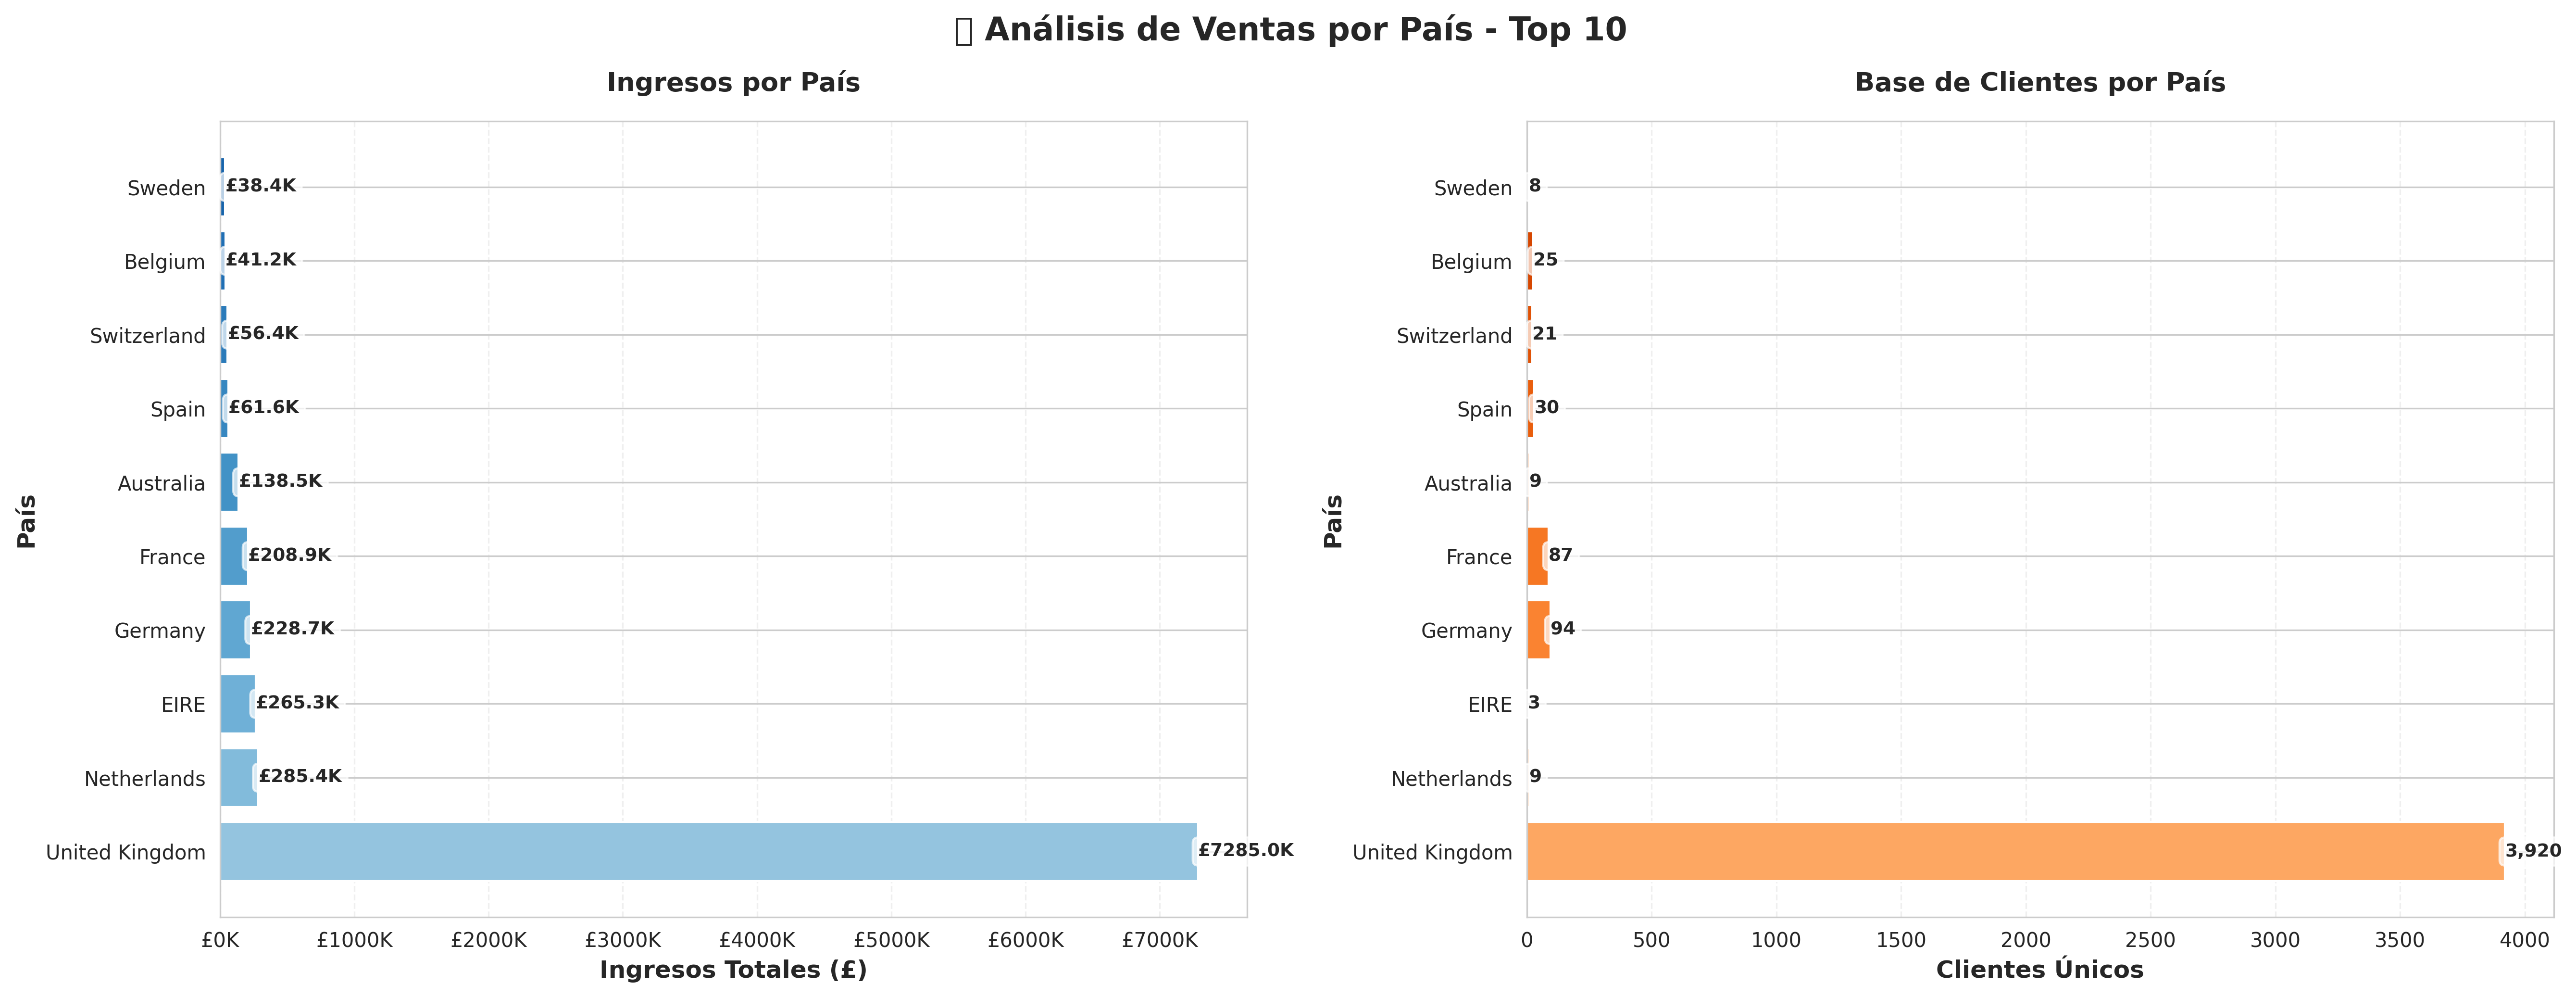

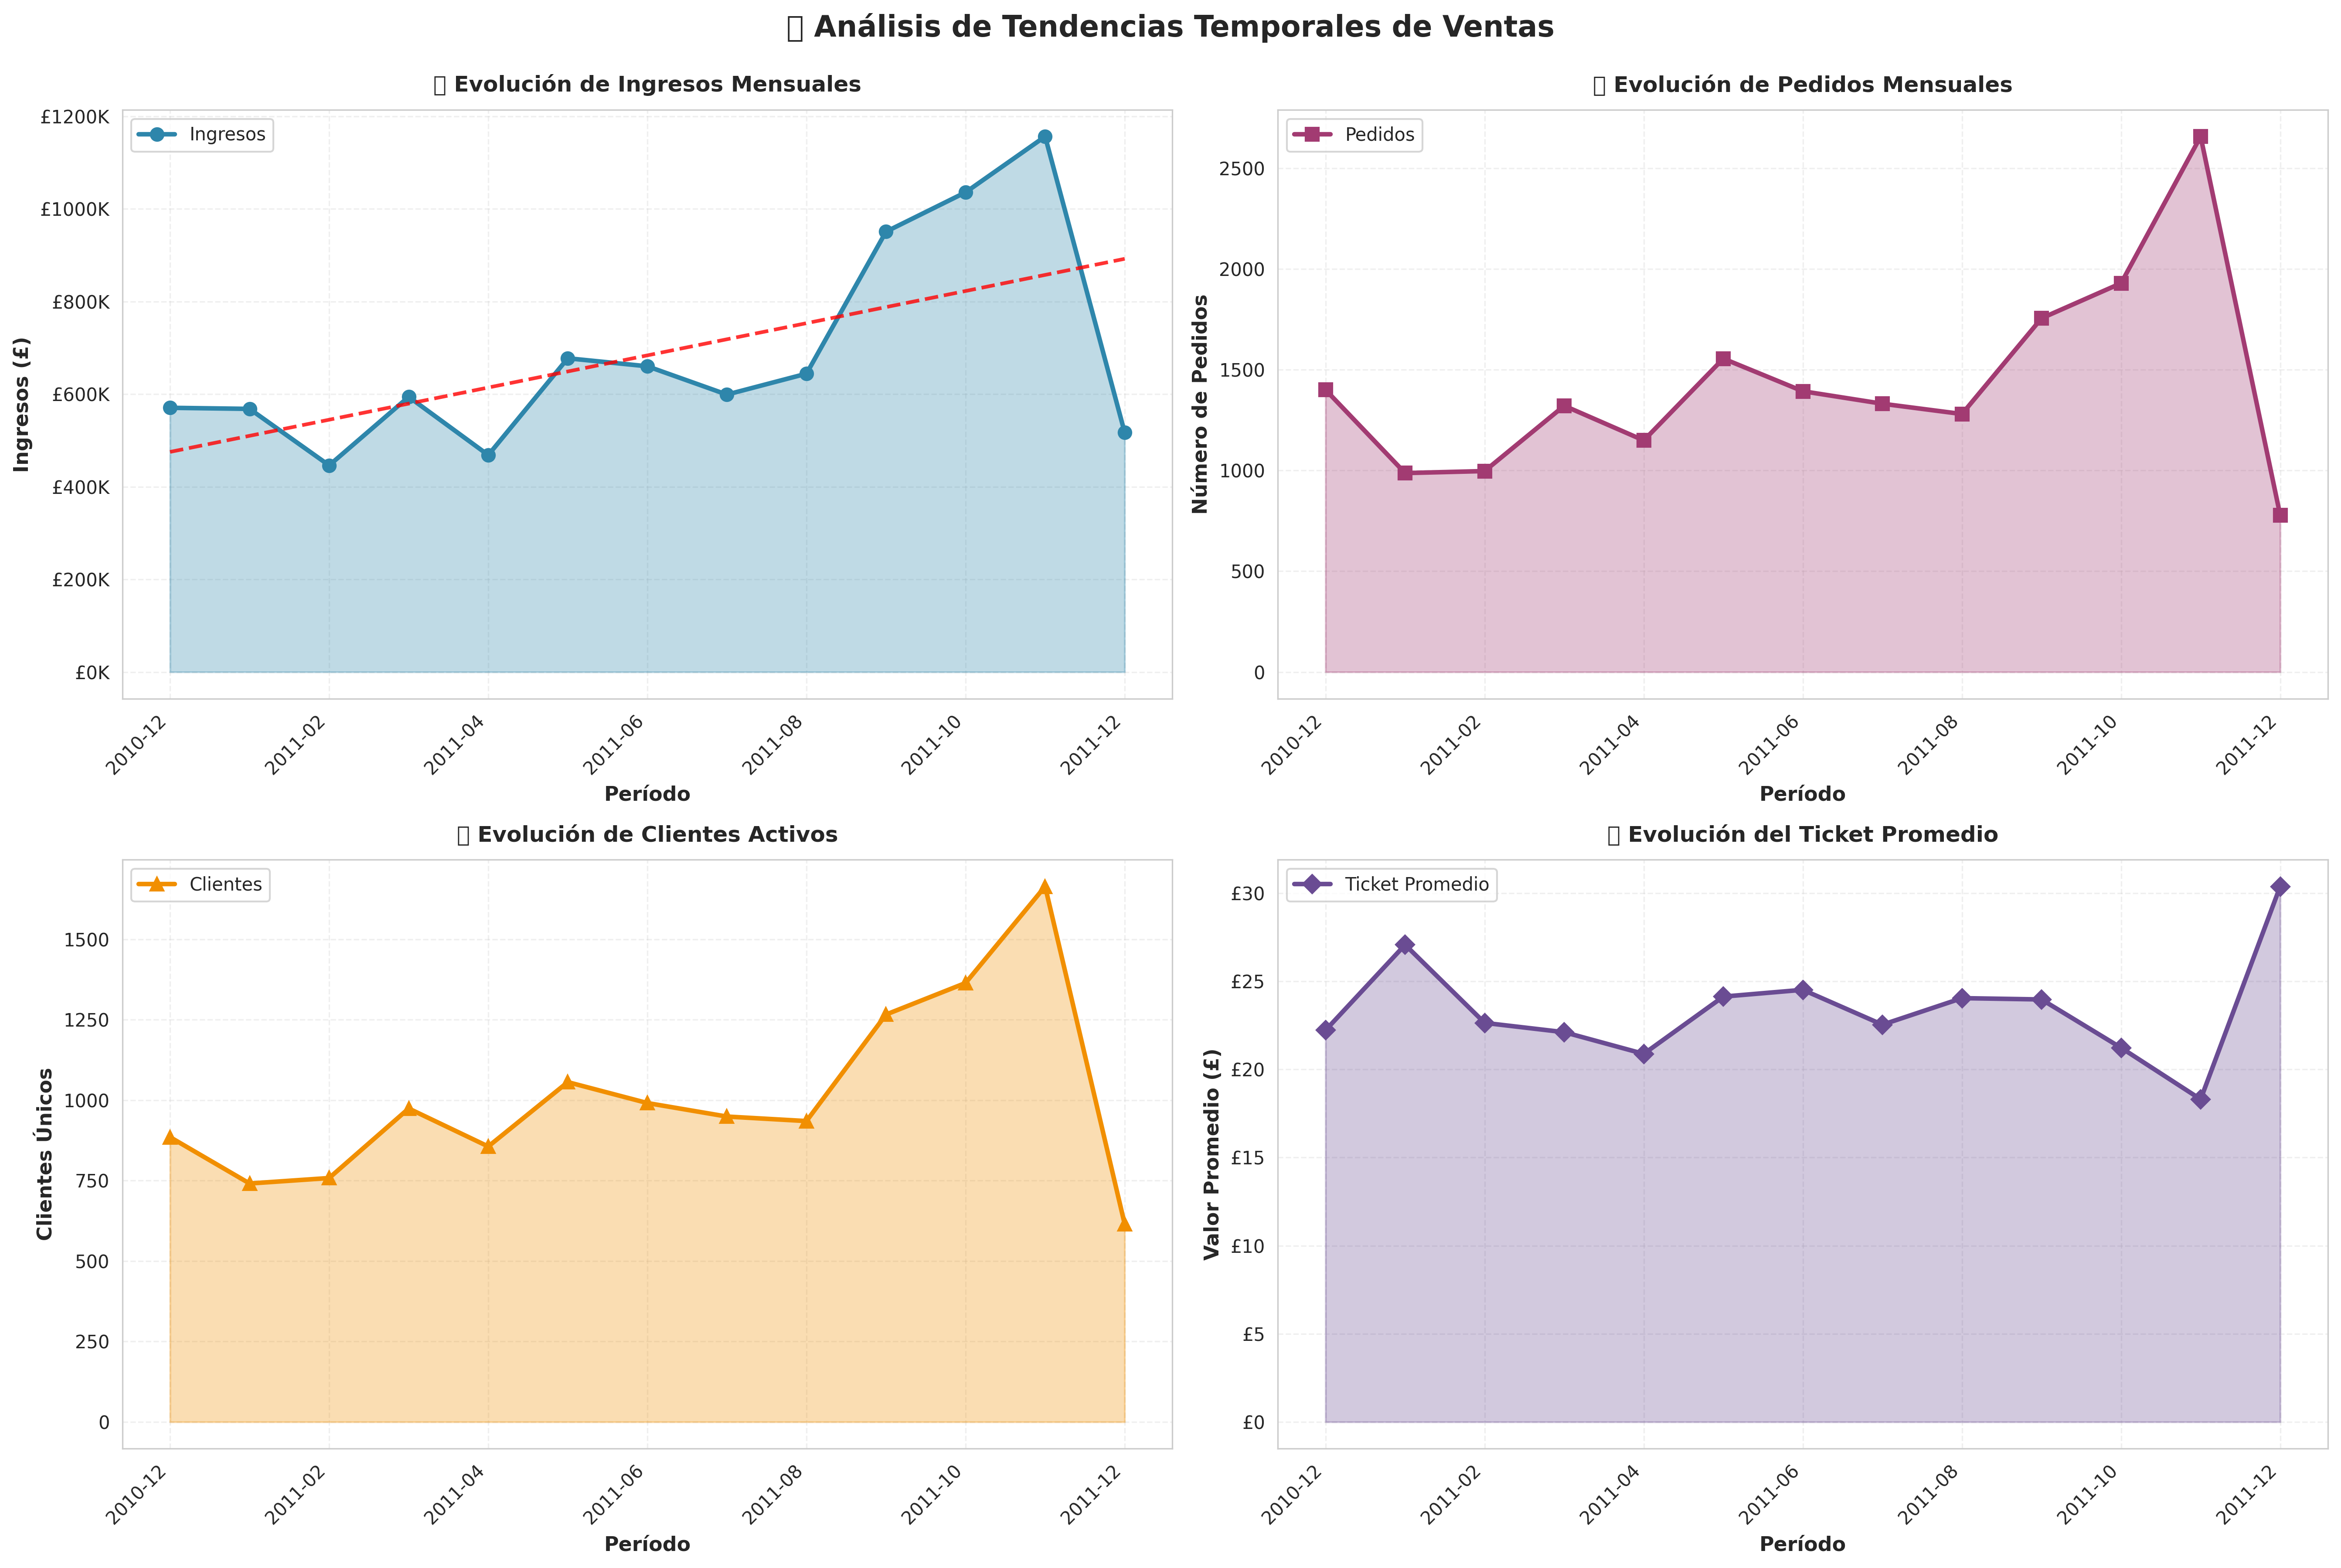

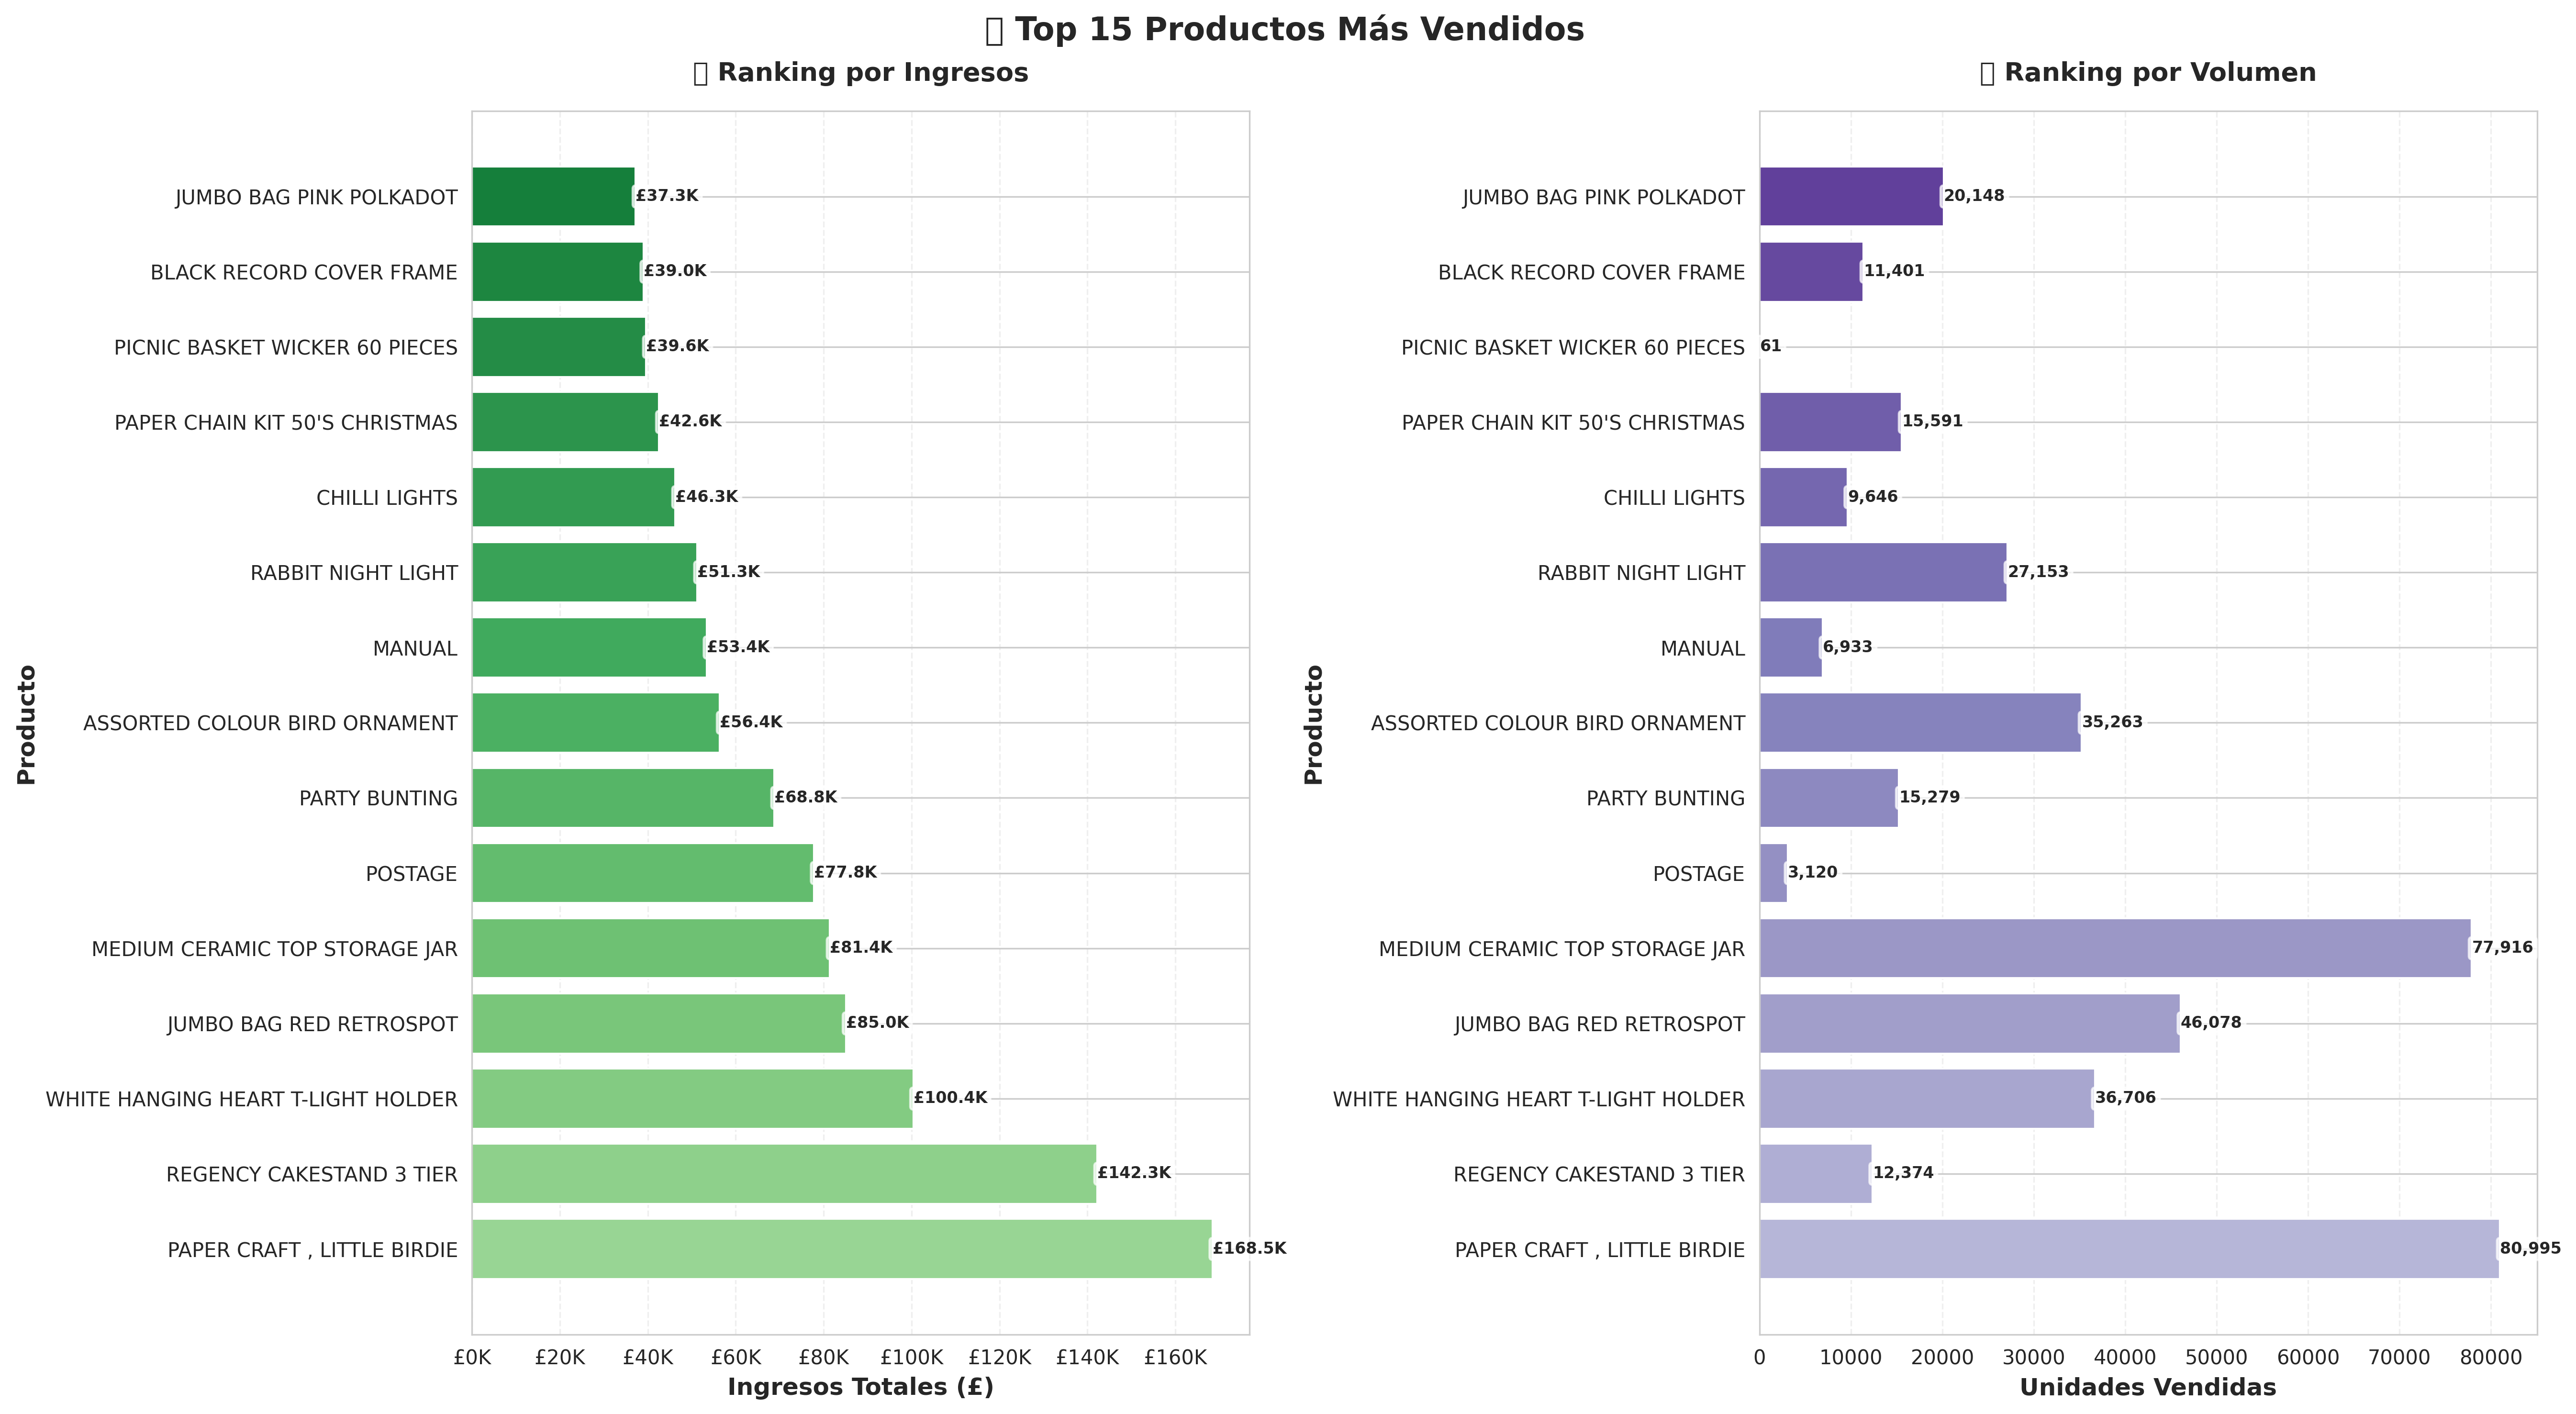

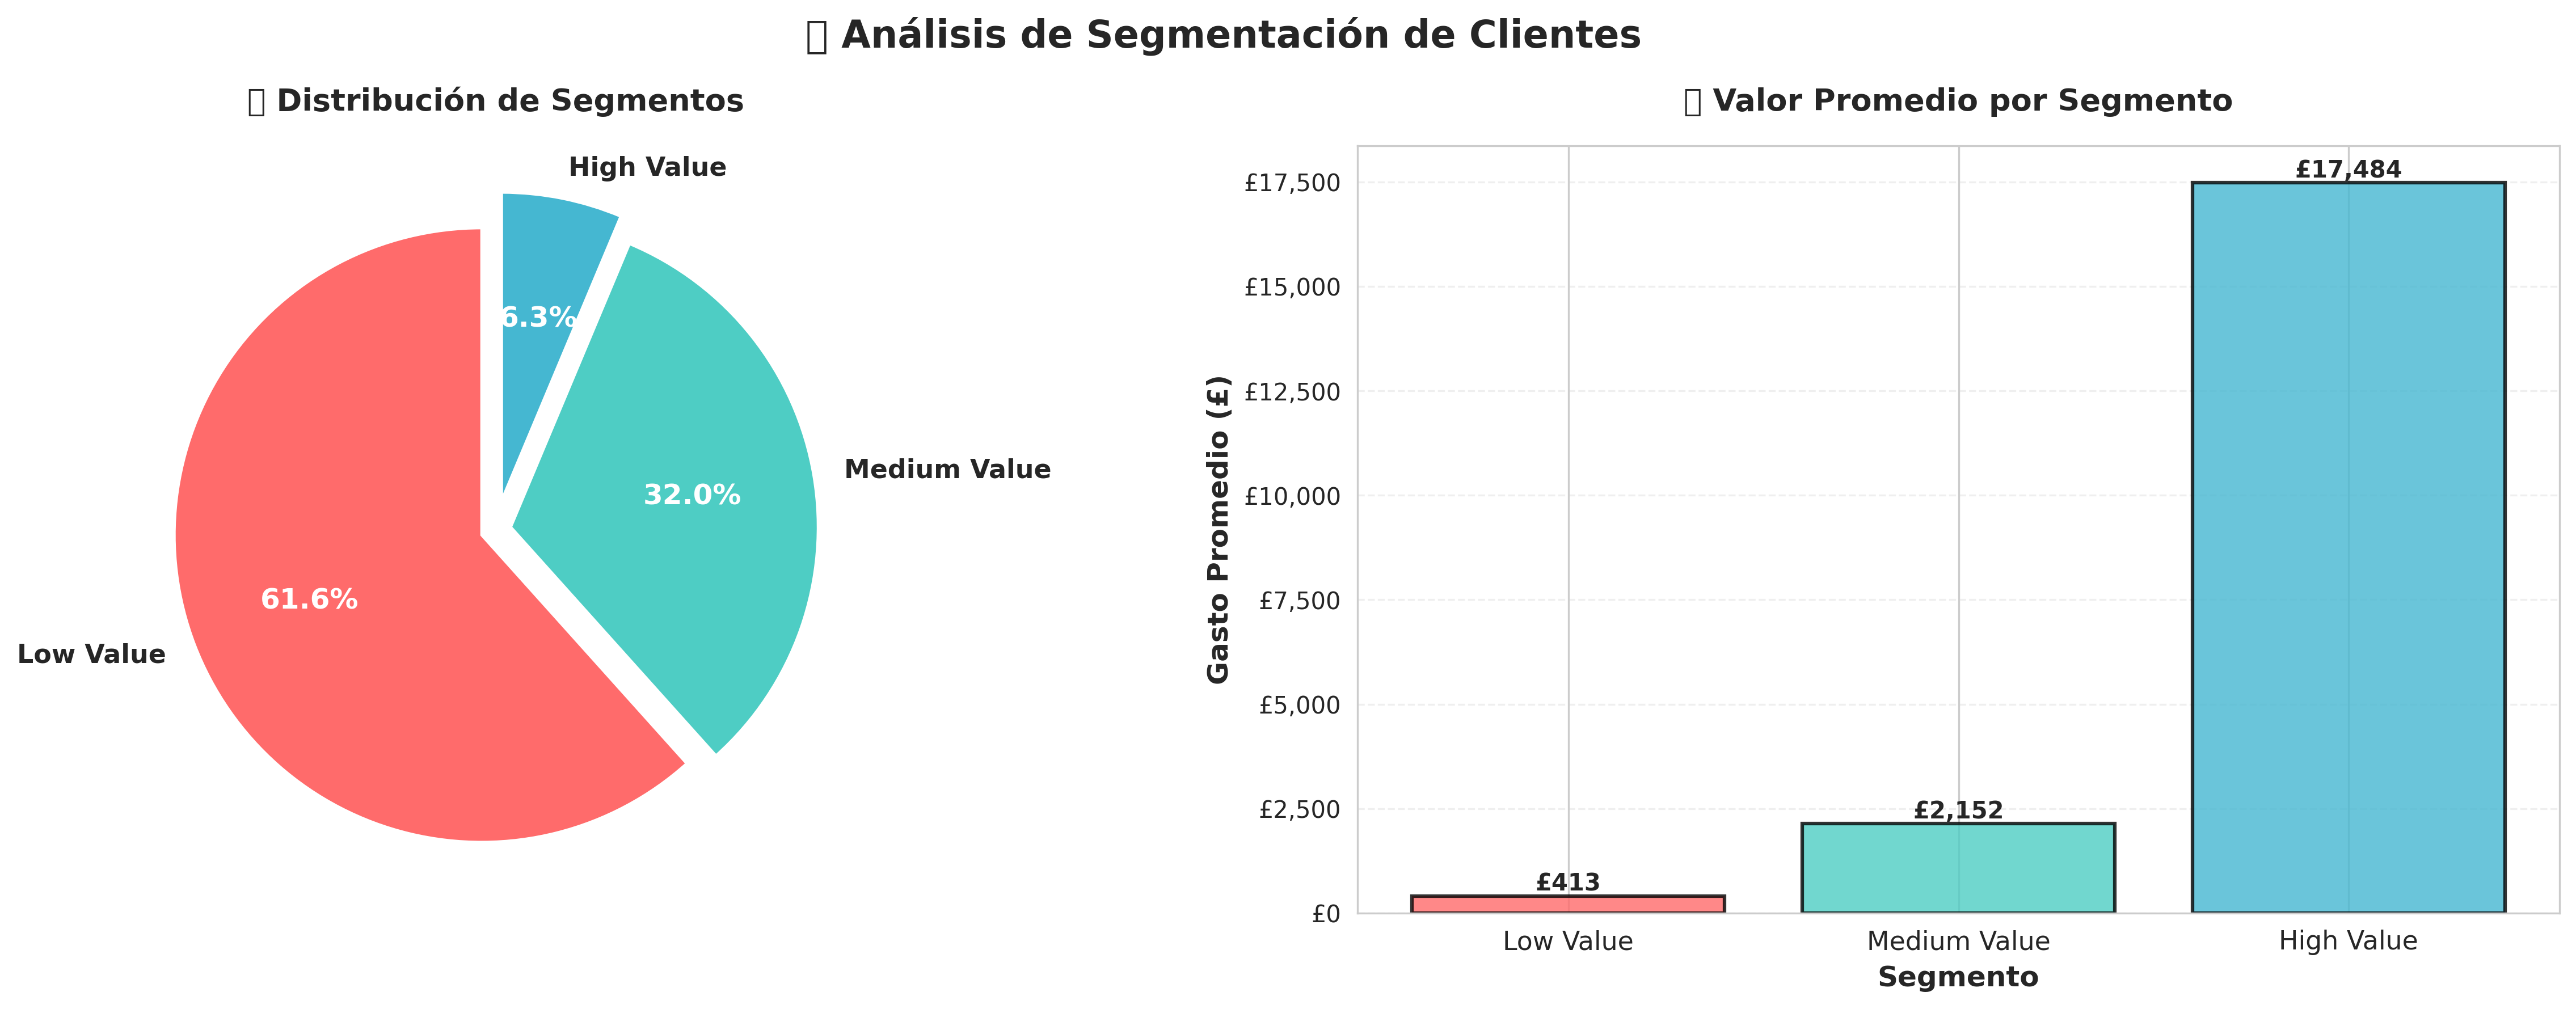


📊 RESUMEN EJECUTIVO DEL PIPELINE

╔==============================================================================╗
║                         PIPELINE ETL COMPLETADO                              ║
╚==============================================================================╝

📊 MÉTRICAS DE PROCESAMIENTO:
--------------------------------------------------------------------------------
  ✅ Estado: SUCCESS
  📅 Timestamp: 2025-11-01 17:17:34

  🥉 Bronze (Datos Crudos): 541,909 registros
  🥈 Silver (Datos Limpios): 392,688 registros
  🗑️  Registros Filtrados: 149,221 (27.54%)
  ✅ Tasa de Retención: 72.46%
  🥇 Tablas Gold Creadas: 4

💼 INSIGHTS DE NEGOCIO:
--------------------------------------------------------------------------------
  💰 Ingresos Totales: £8,887,208.89
  🛒 Valor Promedio de Pedido: £479.56
  👥 Clientes Únicos: 4,338
  📦 Productos Únicos: 3,664
  📋 Total de Pedidos: 18,532
  🌍 Países Atendidos: 37

  🏆 País Principal: United Kingdom
     └─ Ingresos: £7,285,024.64
  📅 Mej

In [1]:
"""
═══════════════════════════════════════════════════════════════════════════════
PIPELINE ETL CON ARQUITECTURA MEDALLION - E-COMMERCE DATASET
═══════════════════════════════════════════════════════════════════════════════

📊 Dataset: Online Retail - Transacciones de tienda británica (2010-2011)
🏗️ Arquitectura: Medallion (Bronze → Silver → Gold)
🎯 Objetivo: Transformar datos crudos en insights analíticos

Autor: Marcelo Rivera Vega Data Engineering
Fecha: 2025-10-29
Versión: 1.0.0
═══════════════════════════════════════════════════════════════════════════════
"""

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 1: INSTALACIÓN Y CONFIGURACIÓN INICIAL
# ═══════════════════════════════════════════════════════════════════════════

print("═" * 80)
print("🚀 INICIANDO PIPELINE ETL CON ARQUITECTURA MEDALLION")
print("═" * 80)
print()

# Instalación de dependencias
print("📦 Instalando dependencias necesarias...")
import sys
!{sys.executable} -m pip install -q pandas numpy matplotlib seaborn openpyxl pyarrow

print("✅ Dependencias instaladas correctamente\n")

# Importar librerías
print("📚 Importando librerías...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from typing import Dict, List, Optional, Tuple
import logging
import warnings
import json

warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente\n")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 2: CONFIGURACIÓN Y ESTRUCTURA DE DIRECTORIOS
# ═══════════════════════════════════════════════════════════════════════════

print("=" * 80)
print("⚙️  CONFIGURACIÓN DEL PIPELINE")
print("=" * 80)
print()

class Config:
    """Configuración centralizada del pipeline ETL"""

    # Rutas base
    BASE_PATH = Path('/content/etl_project')
    DATA_PATH = BASE_PATH / 'data'
    BRONZE_PATH = DATA_PATH / 'bronze'
    SILVER_PATH = DATA_PATH / 'silver'
    GOLD_PATH = DATA_PATH / 'gold'
    LOGS_PATH = BASE_PATH / 'logs'
    VIZ_PATH = BASE_PATH / 'visualizations'

    # URL del dataset
    DATASET_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

    # Parámetros de calidad de datos
    MIN_QUANTITY = 0
    MIN_UNIT_PRICE = 0.01
    MAX_UNIT_PRICE = 10000

    # Configuración de visualizaciones
    PLOT_STYLE = 'whitegrid'
    FIGURE_DPI = 300

    @classmethod
    def create_directories(cls) -> None:
        """Crea la estructura completa de directorios"""
        directories = [
            cls.BRONZE_PATH,
            cls.SILVER_PATH,
            cls.GOLD_PATH,
            cls.LOGS_PATH,
            cls.VIZ_PATH
        ]

        for directory in directories:
            directory.mkdir(parents=True, exist_ok=True)

        print("📁 Estructura de directorios creada:")
        print(f"   ├── 🥉 Bronze: {cls.BRONZE_PATH}")
        print(f"   ├── 🥈 Silver: {cls.SILVER_PATH}")
        print(f"   ├── 🥇 Gold: {cls.GOLD_PATH}")
        print(f"   ├── 📝 Logs: {cls.LOGS_PATH}")
        print(f"   └── 📊 Visualizations: {cls.VIZ_PATH}")
        print()

# Crear estructura
Config.create_directories()

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 3: CONFIGURACIÓN DE LOGGING
# ═══════════════════════════════════════════════════════════════════════════

def setup_logging() -> logging.Logger:
    """
    Configura el sistema de logging del pipeline

    Returns:
        Logger configurado con handlers para archivo y consola
    """
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    log_file = Config.LOGS_PATH / f'etl_pipeline_{timestamp}.log'

    # Configurar formato
    log_format = '%(asctime)s | %(levelname)-8s | %(message)s'
    date_format = '%Y-%m-%d %H:%M:%S'

    # Configurar logging
    logging.basicConfig(
        level=logging.INFO,
        format=log_format,
        datefmt=date_format,
        handlers=[
            logging.FileHandler(log_file, encoding='utf-8'),
            logging.StreamHandler()
        ]
    )

    logger = logging.getLogger('ETL_Pipeline')

    logger.info("=" * 80)
    logger.info("🚀 PIPELINE ETL INICIADO")
    logger.info(f"📅 Timestamp: {timestamp}")
    logger.info(f"📝 Log file: {log_file}")
    logger.info("=" * 80)

    return logger

logger = setup_logging()
print("✅ Sistema de logging configurado\n")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 4: FUNCIONES DE EXTRACCIÓN (BRONZE LAYER)
# ═══════════════════════════════════════════════════════════════════════════

print("=" * 80)
print("🥉 FASE 1: EXTRACCIÓN DE DATOS (BRONZE LAYER)")
print("=" * 80)
print()

def extract_data(logger: logging.Logger) -> Optional[pd.DataFrame]:
    """
    Extrae datos crudos desde la fuente UCI Repository

    Args:
        logger: Logger para registro de eventos

    Returns:
        DataFrame con datos crudos o None si falla la extracción

    Raises:
        Exception: Si hay error en descarga o lectura
    """
    logger.info("🔽 INICIANDO EXTRACCIÓN DE DATOS")
    logger.info(f"📍 Fuente: {Config.DATASET_URL}")

    try:
        # Descargar y leer archivo Excel
        logger.info("⏳ Descargando dataset...")
        df_raw = pd.read_excel(Config.DATASET_URL, engine='openpyxl')

        # Registrar métricas de extracción
        memory_mb = df_raw.memory_usage(deep=True).sum() / (1024 ** 2)

        logger.info("✅ EXTRACCIÓN EXITOSA")
        logger.info(f"   📊 Registros extraídos: {len(df_raw):,}")
        logger.info(f"   📋 Columnas: {len(df_raw.columns)}")
        logger.info(f"   💾 Memoria utilizada: {memory_mb:.2f} MB")
        logger.info(f"   📅 Rango de fechas: {df_raw['InvoiceDate'].min()} a {df_raw['InvoiceDate'].max()}")

        return df_raw

    except Exception as e:
        logger.error(f"❌ ERROR EN EXTRACCIÓN: {str(e)}")
        logger.exception("Stack trace completo:")
        return None


def load_bronze(df: pd.DataFrame, logger: logging.Logger) -> bool:
    """
    Guarda datos crudos en la capa Bronze sin modificaciones

    Args:
        df: DataFrame con datos crudos
        logger: Logger para registro

    Returns:
        True si se guardó exitosamente, False en caso contrario
    """
    logger.info("💾 Guardando datos en capa BRONZE...")

    try:
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filepath = Config.BRONZE_PATH / f'raw_data_{timestamp}.parquet'

        # Crear copia para no modificar el original
        df_to_save = df.copy()

        # Convertir tipos problemáticos para Parquet
        # InvoiceNo puede contener 'C' para cancelaciones, mantener como string
        if 'InvoiceNo' in df_to_save.columns:
            df_to_save['InvoiceNo'] = df_to_save['InvoiceNo'].astype(str)

        # StockCode también puede tener caracteres especiales
        if 'StockCode' in df_to_save.columns:
            df_to_save['StockCode'] = df_to_save['StockCode'].astype(str)

        # Description puede tener valores nulos
        if 'Description' in df_to_save.columns:
            df_to_save['Description'] = df_to_save['Description'].fillna('').astype(str)

        # CustomerID como float (tiene nulos)
        if 'CustomerID' in df_to_save.columns:
            df_to_save['CustomerID'] = df_to_save['CustomerID'].astype('float64')

        # Guardar en formato Parquet con compresión
        df_to_save.to_parquet(filepath, index=False, compression='snappy', engine='pyarrow')

        file_size_mb = filepath.stat().st_size / (1024 ** 2)

        logger.info("✅ DATOS GUARDADOS EN BRONZE")
        logger.info(f"   📁 Archivo: {filepath.name}")
        logger.info(f"   📦 Formato: Parquet (Snappy)")
        logger.info(f"   💾 Tamaño: {file_size_mb:.2f} MB")

        return True

    except Exception as e:
        logger.error(f"❌ ERROR guardando Bronze: {str(e)}")
        logger.exception("Stack trace completo:")
        return False


# Ejecutar extracción
df_raw = extract_data(logger)

if df_raw is not None:
    # Mostrar muestra de datos
    print("\n📋 Primeras 5 filas del dataset:")
    display(df_raw.head())

    print("\n📊 Información del dataset:")
    print(df_raw.info())

    # Guardar en Bronze
    load_bronze(df_raw, logger)
else:
    raise Exception("❌ No se pudieron extraer los datos. Pipeline abortado.")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 5: ANÁLISIS EXPLORATORIO INICIAL
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("🔍 ANÁLISIS EXPLORATORIO DE DATOS CRUDOS")
print("=" * 80)
print()

def analyze_data_quality(df: pd.DataFrame, logger: logging.Logger) -> Dict[str, any]:
    """
    Analiza la calidad de los datos y detecta problemas

    Args:
        df: DataFrame a analizar
        logger: Logger para registro

    Returns:
        Diccionario con métricas de calidad
    """
    logger.info("🔍 Analizando calidad de datos...")

    metrics = {
        'total_rows': len(df),
        'total_columns': len(df.columns),
        'duplicates': df.duplicated().sum(),
        'missing_values': {},
        'invalid_values': {}
    }

    # Analizar valores nulos
    for col in df.columns:
        null_count = df[col].isna().sum()
        if null_count > 0:
            metrics['missing_values'][col] = {
                'count': null_count,
                'percentage': (null_count / len(df)) * 100
            }

    # Validaciones específicas
    if 'Quantity' in df.columns:
        metrics['invalid_values']['negative_quantity'] = (df['Quantity'] < 0).sum()
        metrics['invalid_values']['zero_quantity'] = (df['Quantity'] == 0).sum()

    if 'UnitPrice' in df.columns:
        metrics['invalid_values']['zero_price'] = (df['UnitPrice'] == 0).sum()
        metrics['invalid_values']['negative_price'] = (df['UnitPrice'] < 0).sum()

    # Registrar resultados
    logger.info(f"   📊 Total registros: {metrics['total_rows']:,}")
    logger.info(f"   🔄 Duplicados: {metrics['duplicates']:,} ({metrics['duplicates']/metrics['total_rows']*100:.2f}%)")

    if metrics['missing_values']:
        logger.warning("   ⚠️  Valores nulos detectados:")
        for col, info in metrics['missing_values'].items():
            logger.warning(f"      - {col}: {info['count']:,} ({info['percentage']:.2f}%)")

    if any(metrics['invalid_values'].values()):
        logger.warning("   ⚠️  Valores inválidos detectados:")
        for issue, count in metrics['invalid_values'].items():
            if count > 0:
                logger.warning(f"      - {issue}: {count:,}")

    return metrics

# Ejecutar análisis
quality_metrics = analyze_data_quality(df_raw, logger)

# Mostrar estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df_raw.describe())

# Mostrar distribución de valores nulos
print("\n🔍 Valores Nulos por Columna:")
null_df = pd.DataFrame({
    'Nulos': df_raw.isnull().sum(),
    'Porcentaje': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})
display(null_df[null_df['Nulos'] > 0])

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 6: TRANSFORMACIÓN Y LIMPIEZA (SILVER LAYER)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("🥈 FASE 2: TRANSFORMACIÓN Y LIMPIEZA (SILVER LAYER)")
print("=" * 80)
print()

def transform_silver(df: pd.DataFrame, logger: logging.Logger) -> Optional[pd.DataFrame]:
    """
    Limpia, valida y transforma datos para la capa Silver

    Transformaciones aplicadas:
    1. Eliminación de duplicados
    2. Filtrado de registros con CustomerID válido
    3. Validación de cantidades y precios
    4. Creación de columnas derivadas
    5. Normalización de strings

    Args:
        df: DataFrame de capa Bronze
        logger: Logger para registro

    Returns:
        DataFrame limpio y transformado o None si falla
    """
    logger.info("🔄 INICIANDO TRANSFORMACIÓN A SILVER")

    try:
        df_clean = df.copy()
        initial_rows = len(df_clean)
        logger.info(f"   📊 Registros iniciales: {initial_rows:,}")

        # PASO 1: Eliminar duplicados exactos
        logger.info("   🔄 Paso 1/6: Eliminando duplicados...")
        df_clean = df_clean.drop_duplicates()
        duplicates_removed = initial_rows - len(df_clean)
        logger.info(f"      ✓ Duplicados eliminados: {duplicates_removed:,}")

        # PASO 2: Filtrar CustomerID válido
        logger.info("   👤 Paso 2/6: Filtrando registros con CustomerID...")
        df_clean = df_clean[df_clean['CustomerID'].notna()]
        no_customer_removed = initial_rows - duplicates_removed - len(df_clean)
        logger.info(f"      ✓ Registros sin CustomerID eliminados: {no_customer_removed:,}")

        # PASO 3: Validar Quantity
        logger.info("   📦 Paso 3/6: Validando cantidades...")
        df_clean = df_clean[df_clean['Quantity'] > Config.MIN_QUANTITY]
        logger.info(f"      ✓ Cantidades inválidas filtradas")

        # PASO 4: Validar UnitPrice
        logger.info("   💰 Paso 4/6: Validando precios...")
        df_clean = df_clean[
            (df_clean['UnitPrice'] >= Config.MIN_UNIT_PRICE) &
            (df_clean['UnitPrice'] <= Config.MAX_UNIT_PRICE)
        ]
        logger.info(f"      ✓ Precios inválidos filtrados")

        # PASO 5: Crear columnas derivadas
        logger.info("   ➕ Paso 5/6: Creando columnas derivadas...")

        # Precio total
        df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

        # Componentes de fecha
        df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
        df_clean['Year'] = df_clean['InvoiceDate'].dt.year
        df_clean['Month'] = df_clean['InvoiceDate'].dt.month
        df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M').astype(str)
        df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
        df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()
        df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
        df_clean['IsWeekend'] = df_clean['DayOfWeek'].isin([5, 6]).astype(int)

        logger.info(f"      ✓ 8 columnas derivadas creadas")

        # PASO 6: Normalizar strings
        logger.info("   🔤 Paso 6/6: Normalizando strings...")

        # Description puede tener nulos, rellenar antes de normalizar
        df_clean['Description'] = df_clean['Description'].fillna('UNKNOWN').str.strip().str.upper()
        df_clean['Country'] = df_clean['Country'].str.strip()

        # InvoiceNo mantener como string (contiene 'C' para cancelaciones)
        df_clean['InvoiceNo'] = df_clean['InvoiceNo'].astype(str).str.strip()

        # StockCode mantener como string
        df_clean['StockCode'] = df_clean['StockCode'].astype(str).str.strip()

        # CustomerID convertir a entero (ya filtramos nulos)
        df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

        logger.info(f"      ✓ Strings normalizados")

        # Resumen final
        final_rows = len(df_clean)
        removed_rows = initial_rows - final_rows
        retention_rate = (final_rows / initial_rows) * 100

        logger.info("✅ TRANSFORMACIÓN COMPLETADA")
        logger.info(f"   📊 Registros iniciales: {initial_rows:,}")
        logger.info(f"   📊 Registros finales: {final_rows:,}")
        logger.info(f"   🗑️  Registros eliminados: {removed_rows:,} ({(removed_rows/initial_rows)*100:.2f}%)")
        logger.info(f"   ✅ Tasa de retención: {retention_rate:.2f}%")
        logger.info(f"   ➕ Columnas adicionales: 8")

        return df_clean

    except Exception as e:
        logger.error(f"❌ ERROR en transformación Silver: {str(e)}")
        logger.exception("Stack trace completo:")
        return None


def load_silver(df: pd.DataFrame, logger: logging.Logger) -> bool:
    """
    Guarda datos limpios en la capa Silver

    Args:
        df: DataFrame limpio
        logger: Logger para registro

    Returns:
        True si se guardó exitosamente
    """
    logger.info("💾 Guardando datos en capa SILVER...")

    try:
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filepath = Config.SILVER_PATH / f'clean_data_{timestamp}.parquet'

        df.to_parquet(filepath, index=False, compression='snappy')

        file_size_mb = filepath.stat().st_size / (1024 ** 2)

        logger.info("✅ DATOS GUARDADOS EN SILVER")
        logger.info(f"   📁 Archivo: {filepath.name}")
        logger.info(f"   💾 Tamaño: {file_size_mb:.2f} MB")

        return True

    except Exception as e:
        logger.error(f"❌ ERROR guardando Silver: {str(e)}")
        return False


# Ejecutar transformación
df_clean = transform_silver(df_raw, logger)

if df_clean is not None:
    # Mostrar datos limpios
    print("\n📋 Primeras 5 filas después de limpieza:")
    display(df_clean.head())

    print("\n📊 Nuevas columnas creadas:")
    new_columns = ['TotalPrice', 'Year', 'Month', 'YearMonth', 'DayOfWeek',
                   'DayName', 'Hour', 'IsWeekend']
    display(df_clean[new_columns].head())

    # Guardar en Silver
    load_silver(df_clean, logger)
else:
    raise Exception("❌ Transformación Silver falló. Pipeline abortado.")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 7: AGREGACIONES (GOLD LAYER)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("🥇 FASE 3: AGREGACIONES ANALÍTICAS (GOLD LAYER)")
print("=" * 80)
print()

def aggregate_sales_by_country(df: pd.DataFrame, logger: logging.Logger) -> Optional[pd.DataFrame]:
    """
    Agrega métricas de ventas por país

    Métricas calculadas:
    - Total de pedidos únicos
    - Clientes únicos
    - Unidades vendidas
    - Ingresos totales
    - Valor promedio de pedido

    Args:
        df: DataFrame de capa Silver
        logger: Logger para registro

    Returns:
        DataFrame agregado por país
    """
    logger.info("🌍 Creando agregación: VENTAS POR PAÍS")

    try:
        df_country = df.groupby('Country').agg({
            'InvoiceNo': 'nunique',
            'CustomerID': 'nunique',
            'Quantity': 'sum',
            'TotalPrice': 'sum'
        }).reset_index()

        df_country.columns = ['Country', 'TotalOrders', 'UniqueCustomers',
                              'TotalQuantity', 'TotalRevenue']

        # Calcular métricas derivadas
        df_country['AvgOrderValue'] = df_country['TotalRevenue'] / df_country['TotalOrders']
        df_country['AvgQuantityPerOrder'] = df_country['TotalQuantity'] / df_country['TotalOrders']
        df_country['RevenuePerCustomer'] = df_country['TotalRevenue'] / df_country['UniqueCustomers']

        # Ordenar por ingresos
        df_country = df_country.sort_values('TotalRevenue', ascending=False)

        logger.info(f"   ✅ Agregación completada: {len(df_country)} países procesados")
        logger.info(f"   🏆 Top país: {df_country.iloc[0]['Country']} (£{df_country.iloc[0]['TotalRevenue']:,.2f})")

        return df_country

    except Exception as e:
        logger.error(f"   ❌ Error en agregación por país: {str(e)}")
        return None


def aggregate_sales_by_time(df: pd.DataFrame, logger: logging.Logger) -> Optional[pd.DataFrame]:
    """
    Agrega métricas de ventas por período temporal (mensual)

    Args:
        df: DataFrame de capa Silver
        logger: Logger para registro

    Returns:
        DataFrame agregado por período
    """
    logger.info("📅 Creando agregación: VENTAS POR PERÍODO")

    try:
        df_time = df.groupby('YearMonth').agg({
            'InvoiceNo': 'nunique',
            'CustomerID': 'nunique',
            'TotalPrice': ['sum', 'mean'],
            'Quantity': 'sum'
        }).reset_index()

        df_time.columns = ['YearMonth', 'TotalOrders', 'UniqueCustomers',
                          'TotalRevenue', 'AvgOrderValue', 'TotalQuantity']

        # Calcular crecimiento mensual
        df_time['RevenueGrowth'] = df_time['TotalRevenue'].pct_change() * 100
        df_time['OrdersGrowth'] = df_time['TotalOrders'].pct_change() * 100

        logger.info(f"   ✅ Agregación completada: {len(df_time)} períodos procesados")

        # Identificar mejor mes
        best_month_idx = df_time['TotalRevenue'].idxmax()
        best_month = df_time.loc[best_month_idx, 'YearMonth']
        best_revenue = df_time.loc[best_month_idx, 'TotalRevenue']

        logger.info(f"   🏆 Mejor mes: {best_month} (£{best_revenue:,.2f})")

        return df_time

    except Exception as e:
        logger.error(f"   ❌ Error en agregación temporal: {str(e)}")
        return None


def aggregate_top_products(df: pd.DataFrame, logger: logging.Logger, top_n: int = 50) -> Optional[pd.DataFrame]:
    """
    Identifica y agrega métricas de los productos más vendidos

    Args:
        df: DataFrame de capa Silver
        logger: Logger para registro
        top_n: Número de productos top a retornar

    Returns:
        DataFrame con top productos
    """
    logger.info(f"🏆 Creando agregación: TOP {top_n} PRODUCTOS")

    try:
        df_products = df.groupby(['StockCode', 'Description']).agg({
            'Quantity': 'sum',
            'TotalPrice': 'sum',
            'InvoiceNo': 'nunique',
            'CustomerID': 'nunique'
        }).reset_index()

        df_products.columns = ['StockCode', 'Description', 'TotalQuantitySold',
                               'TotalRevenue', 'TotalOrders', 'UniqueCustomers']

        # Calcular métricas derivadas
        df_products['AvgPricePerUnit'] = df_products['TotalRevenue'] / df_products['TotalQuantitySold']
        df_products['AvgQuantityPerOrder'] = df_products['TotalQuantitySold'] / df_products['TotalOrders']

        # Seleccionar top N por ingresos
        df_products = df_products.sort_values('TotalRevenue', ascending=False).head(top_n)

        logger.info(f"   ✅ Top {top_n} productos identificados")

        top_product = df_products.iloc[0]
        logger.info(f"   🥇 Top producto: {top_product['Description'][:40]}")
        logger.info(f"      - Ingresos: £{top_product['TotalRevenue']:,.2f}")
        logger.info(f"      - Unidades: {top_product['TotalQuantitySold']:,.0f}")

        return df_products

    except Exception as e:
        logger.error(f"   ❌ Error en agregación de productos: {str(e)}")
        return None


def aggregate_customer_segments(df: pd.DataFrame, logger: logging.Logger) -> Optional[pd.DataFrame]:
    """
    Crea segmentación de clientes basada en comportamiento de compra

    Args:
        df: DataFrame de capa Silver
        logger: Logger para registro

    Returns:
        DataFrame con segmentos de clientes
    """
    logger.info("👥 Creando agregación: SEGMENTACIÓN DE CLIENTES")

    try:
        df_customers = df.groupby('CustomerID').agg({
            'InvoiceNo': 'nunique',
            'TotalPrice': 'sum',
            'Quantity': 'sum',
            'InvoiceDate': ['min', 'max']
        }).reset_index()

        df_customers.columns = ['CustomerID', 'TotalOrders', 'TotalSpent',
                               'TotalItems', 'FirstPurchase', 'LastPurchase']

        # Calcular métricas derivadas
        df_customers['AvgOrderValue'] = df_customers['TotalSpent'] / df_customers['TotalOrders']
        df_customers['CustomerLifetime'] = (df_customers['LastPurchase'] - df_customers['FirstPurchase']).dt.days

        # Crear segmentos basados en valor total gastado
        df_customers['Segment'] = pd.cut(
            df_customers['TotalSpent'],
            bins=[0, 1000, 5000, float('inf')],
            labels=['Low Value', 'Medium Value', 'High Value']
        )

        logger.info(f"   ✅ {len(df_customers)} clientes segmentados")

        # Estadísticas por segmento
        segment_stats = df_customers.groupby('Segment').size()
        logger.info(f"   📊 Distribución de segmentos:")
        for segment, count in segment_stats.items():
            logger.info(f"      - {segment}: {count:,} clientes ({count/len(df_customers)*100:.1f}%)")

        return df_customers

    except Exception as e:
        logger.error(f"   ❌ Error en segmentación de clientes: {str(e)}")
        return None


def load_gold(dataframes: Dict[str, pd.DataFrame], logger: logging.Logger) -> bool:
    """
    Guarda todas las tablas agregadas en la capa Gold

    Args:
        dataframes: Diccionario con nombre y DataFrame de cada agregación
        logger: Logger para registro

    Returns:
        True si todas las tablas se guardaron exitosamente
    """
    logger.info("💾 Guardando tablas en capa GOLD...")

    success = True
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    try:
        for name, df in dataframes.items():
            if df is not None and not df.empty:
                filepath = Config.GOLD_PATH / f'{name}_{timestamp}.parquet'
                df.to_parquet(filepath, index=False, compression='snappy')

                file_size_mb = filepath.stat().st_size / (1024 ** 2)
                logger.info(f"   ✅ {name}: {len(df)} registros ({file_size_mb:.2f} MB)")
            else:
                logger.warning(f"   ⚠️  {name}: Tabla vacía o None, no guardada")
                success = False

        if success:
            logger.info("✅ TODAS LAS TABLAS GOLD GUARDADAS EXITOSAMENTE")

        return success

    except Exception as e:
        logger.error(f"❌ ERROR guardando Gold: {str(e)}")
        return False


# Ejecutar agregaciones
print("Generando tablas agregadas...\n")

gold_tables = {
    'sales_by_country': aggregate_sales_by_country(df_clean, logger),
    'sales_by_time': aggregate_sales_by_time(df_clean, logger),
    'top_products': aggregate_top_products(df_clean, logger, top_n=50),
    'customer_segments': aggregate_customer_segments(df_clean, logger)
}

# Guardar en Gold
load_gold(gold_tables, logger)

# Mostrar muestras de cada tabla
print("\n" + "=" * 80)
print("📊 TABLAS GOLD GENERADAS - VISTA PREVIA")
print("=" * 80)

for table_name, df_gold in gold_tables.items():
    if df_gold is not None:
        print(f"\n🥇 {table_name.replace('_', ' ').upper()}")
        print("-" * 80)
        display(df_gold.head(10))

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 8: VISUALIZACIONES
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("📊 FASE 4: GENERACIÓN DE VISUALIZACIONES")
print("=" * 80)
print()

# Configurar estilo
sns.set_style(Config.PLOT_STYLE)
plt.rcParams['figure.dpi'] = Config.FIGURE_DPI

def plot_top_countries_dashboard(df_country: pd.DataFrame, logger: logging.Logger) -> None:
    """
    Crea dashboard de análisis de países (2 gráficos)

    Args:
        df_country: DataFrame con ventas por país
        logger: Logger para registro
    """
    logger.info("📈 Generando visualización: Top Países")

    try:
        # Preparar datos (top 10)
        df_top = df_country.nlargest(10, 'TotalRevenue')

        # Crear figura con 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        fig.suptitle('🌍 Análisis de Ventas por País - Top 10',
                     fontsize=16, fontweight='bold', y=0.98)

        # Gráfico 1: Ingresos totales
        colors1 = plt.cm.Blues(np.linspace(0.4, 0.8, len(df_top)))
        bars1 = ax1.barh(df_top['Country'], df_top['TotalRevenue'], color=colors1)

        ax1.set_xlabel('Ingresos Totales (£)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('País', fontsize=12, fontweight='bold')
        ax1.set_title('Ingresos por País', fontsize=13, fontweight='bold', pad=15)
        ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
        ax1.grid(axis='x', alpha=0.3, linestyle='--')

        # Añadir valores en las barras
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            ax1.text(width, bar.get_y() + bar.get_height()/2,
                    f'£{width/1000:.1f}K',
                    ha='left', va='center', fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

        # Gráfico 2: Clientes únicos
        colors2 = plt.cm.Oranges(np.linspace(0.4, 0.8, len(df_top)))
        bars2 = ax2.barh(df_top['Country'], df_top['UniqueCustomers'], color=colors2)

        ax2.set_xlabel('Clientes Únicos', fontsize=12, fontweight='bold')
        ax2.set_ylabel('País', fontsize=12, fontweight='bold')
        ax2.set_title('Base de Clientes por País', fontsize=13, fontweight='bold', pad=15)
        ax2.grid(axis='x', alpha=0.3, linestyle='--')

        # Añadir valores
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            ax2.text(width, bar.get_y() + bar.get_height()/2,
                    f'{int(width):,}',
                    ha='left', va='center', fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

        plt.tight_layout()

        # Guardar
        filepath = Config.VIZ_PATH / 'top_countries_dashboard.png'
        plt.savefig(filepath, dpi=Config.FIGURE_DPI, bbox_inches='tight')
        logger.info(f"   ✅ Guardado: {filepath.name}")

        plt.show()

    except Exception as e:
        logger.error(f"   ❌ Error generando gráfico de países: {str(e)}")


def plot_sales_trends(df_time: pd.DataFrame, logger: logging.Logger) -> None:
    """
    Crea dashboard de tendencias temporales (4 gráficos)

    Args:
        df_time: DataFrame con ventas por período
        logger: Logger para registro
    """
    logger.info("📈 Generando visualización: Tendencias Temporales")

    try:
        # Crear figura con 4 subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle('📅 Análisis de Tendencias Temporales de Ventas',
                     fontsize=16, fontweight='bold', y=0.995)

        x_indices = range(len(df_time))

        # Gráfico 1: Ingresos totales
        ax1.plot(x_indices, df_time['TotalRevenue'],
                marker='o', linewidth=2.5, markersize=7, color='#2E86AB', label='Ingresos')
        ax1.fill_between(x_indices, df_time['TotalRevenue'], alpha=0.3, color='#2E86AB')
        ax1.set_xlabel('Período', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Ingresos (£)', fontsize=11, fontweight='bold')
        ax1.set_title('📈 Evolución de Ingresos Mensuales', fontsize=12, fontweight='bold', pad=10)
        ax1.set_xticks(x_indices[::2])
        ax1.set_xticklabels(df_time['YearMonth'].values[::2], rotation=45, ha='right')
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.legend(loc='upper left')

        # Añadir línea de tendencia
        z = np.polyfit(x_indices, df_time['TotalRevenue'], 1)
        p = np.poly1d(z)
        ax1.plot(x_indices, p(x_indices), "--", alpha=0.8, color='red', linewidth=2, label='Tendencia')

        # Gráfico 2: Número de pedidos
        ax2.plot(x_indices, df_time['TotalOrders'],
                marker='s', linewidth=2.5, markersize=7, color='#A23B72', label='Pedidos')
        ax2.fill_between(x_indices, df_time['TotalOrders'], alpha=0.3, color='#A23B72')
        ax2.set_xlabel('Período', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Número de Pedidos', fontsize=11, fontweight='bold')
        ax2.set_title('📦 Evolución de Pedidos Mensuales', fontsize=12, fontweight='bold', pad=10)
        ax2.set_xticks(x_indices[::2])
        ax2.set_xticklabels(df_time['YearMonth'].values[::2], rotation=45, ha='right')
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.legend(loc='upper left')

        # Gráfico 3: Clientes únicos
        ax3.plot(x_indices, df_time['UniqueCustomers'],
                marker='^', linewidth=2.5, markersize=7, color='#F18F01', label='Clientes')
        ax3.fill_between(x_indices, df_time['UniqueCustomers'], alpha=0.3, color='#F18F01')
        ax3.set_xlabel('Período', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Clientes Únicos', fontsize=11, fontweight='bold')
        ax3.set_title('👥 Evolución de Clientes Activos', fontsize=12, fontweight='bold', pad=10)
        ax3.set_xticks(x_indices[::2])
        ax3.set_xticklabels(df_time['YearMonth'].values[::2], rotation=45, ha='right')
        ax3.grid(True, alpha=0.3, linestyle='--')
        ax3.legend(loc='upper left')

        # Gráfico 4: Valor promedio de pedido
        ax4.plot(x_indices, df_time['AvgOrderValue'],
                marker='D', linewidth=2.5, markersize=7, color='#6A4C93', label='Ticket Promedio')
        ax4.fill_between(x_indices, df_time['AvgOrderValue'], alpha=0.3, color='#6A4C93')
        ax4.set_xlabel('Período', fontsize=11, fontweight='bold')
        ax4.set_ylabel('Valor Promedio (£)', fontsize=11, fontweight='bold')
        ax4.set_title('💰 Evolución del Ticket Promedio', fontsize=12, fontweight='bold', pad=10)
        ax4.set_xticks(x_indices[::2])
        ax4.set_xticklabels(df_time['YearMonth'].values[::2], rotation=45, ha='right')
        ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:.0f}'))
        ax4.grid(True, alpha=0.3, linestyle='--')
        ax4.legend(loc='upper left')

        plt.tight_layout()

        # Guardar
        filepath = Config.VIZ_PATH / 'sales_trends_dashboard.png'
        plt.savefig(filepath, dpi=Config.FIGURE_DPI, bbox_inches='tight')
        logger.info(f"   ✅ Guardado: {filepath.name}")

        plt.show()

    except Exception as e:
        logger.error(f"   ❌ Error generando gráfico de tendencias: {str(e)}")


def plot_top_products(df_products: pd.DataFrame, logger: logging.Logger, top_n: int = 15) -> None:
    """
    Crea visualización de top productos

    Args:
        df_products: DataFrame con productos
        logger: Logger para registro
        top_n: Número de productos a mostrar
    """
    logger.info(f"📈 Generando visualización: Top {top_n} Productos")

    try:
        df_top = df_products.head(top_n).copy()

        # Truncar descripciones largas
        df_top['DescriptionShort'] = df_top['Description'].apply(
            lambda x: x[:45] + '...' if len(x) > 45 else x
        )

        # Crear figura
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
        fig.suptitle(f'🏆 Top {top_n} Productos Más Vendidos',
                     fontsize=16, fontweight='bold', y=0.98)

        # Gráfico 1: Por ingresos
        colors1 = plt.cm.Greens(np.linspace(0.4, 0.8, len(df_top)))
        bars1 = ax1.barh(df_top['DescriptionShort'], df_top['TotalRevenue'], color=colors1)

        ax1.set_xlabel('Ingresos Totales (£)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Producto', fontsize=12, fontweight='bold')
        ax1.set_title('📊 Ranking por Ingresos', fontsize=13, fontweight='bold', pad=15)
        ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
        ax1.grid(axis='x', alpha=0.3, linestyle='--')

        # Añadir valores
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            ax1.text(width, bar.get_y() + bar.get_height()/2,
                    f'£{width/1000:.1f}K',
                    ha='left', va='center', fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

        # Gráfico 2: Por unidades vendidas
        colors2 = plt.cm.Purples(np.linspace(0.4, 0.8, len(df_top)))
        bars2 = ax2.barh(df_top['DescriptionShort'], df_top['TotalQuantitySold'], color=colors2)

        ax2.set_xlabel('Unidades Vendidas', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Producto', fontsize=12, fontweight='bold')
        ax2.set_title('📦 Ranking por Volumen', fontsize=13, fontweight='bold', pad=15)
        ax2.grid(axis='x', alpha=0.3, linestyle='--')

        # Añadir valores
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            ax2.text(width, bar.get_y() + bar.get_height()/2,
                    f'{int(width):,}',
                    ha='left', va='center', fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

        plt.tight_layout()

        # Guardar
        filepath = Config.VIZ_PATH / 'top_products_analysis.png'
        plt.savefig(filepath, dpi=Config.FIGURE_DPI, bbox_inches='tight')
        logger.info(f"   ✅ Guardado: {filepath.name}")

        plt.show()

    except Exception as e:
        logger.error(f"   ❌ Error generando gráfico de productos: {str(e)}")


def plot_customer_segments(df_segments: pd.DataFrame, logger: logging.Logger) -> None:
    """
    Crea visualización de segmentación de clientes

    Args:
        df_segments: DataFrame con segmentos de clientes
        logger: Logger para registro
    """
    logger.info("📈 Generando visualización: Segmentación de Clientes")

    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle('👥 Análisis de Segmentación de Clientes',
                     fontsize=16, fontweight='bold', y=0.98)

        # Gráfico 1: Distribución de segmentos (pie chart)
        segment_counts = df_segments['Segment'].value_counts()
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        explode = (0.05, 0.05, 0.1)  # Destacar High Value

        wedges, texts, autotexts = ax1.pie(
            segment_counts.values,
            labels=segment_counts.index,
            autopct='%1.1f%%',
            colors=colors,
            explode=explode,
            startangle=90,
            textprops={'fontsize': 11, 'fontweight': 'bold'}
        )

        ax1.set_title('📊 Distribución de Segmentos', fontsize=13, fontweight='bold', pad=15)

        # Mejorar apariencia
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(12)

        # Gráfico 2: Valor promedio por segmento (bar chart)
        segment_stats = df_segments.groupby('Segment').agg({
            'TotalSpent': 'mean',
            'TotalOrders': 'mean'
        }).reset_index()

        x_pos = np.arange(len(segment_stats))
        bars = ax2.bar(x_pos, segment_stats['TotalSpent'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

        ax2.set_xlabel('Segmento', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Gasto Promedio (£)', fontsize=12, fontweight='bold')
        ax2.set_title('💰 Valor Promedio por Segmento', fontsize=13, fontweight='bold', pad=15)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(segment_stats['Segment'], fontsize=11)
        ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))
        ax2.grid(axis='y', alpha=0.3, linestyle='--')

        # Añadir valores sobre las barras
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, height,
                    f'£{height:,.0f}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.tight_layout()

        # Guardar
        filepath = Config.VIZ_PATH / 'customer_segments_analysis.png'
        plt.savefig(filepath, dpi=Config.FIGURE_DPI, bbox_inches='tight')
        logger.info(f"   ✅ Guardado: {filepath.name}")

        plt.show()

    except Exception as e:
        logger.error(f"   ❌ Error generando gráfico de segmentos: {str(e)}")


# Generar todas las visualizaciones
print("Generando dashboard de visualizaciones...\n")

if gold_tables['sales_by_country'] is not None:
    plot_top_countries_dashboard(gold_tables['sales_by_country'], logger)

if gold_tables['sales_by_time'] is not None:
    plot_sales_trends(gold_tables['sales_by_time'], logger)

if gold_tables['top_products'] is not None:
    plot_top_products(gold_tables['top_products'], logger, top_n=15)

if gold_tables['customer_segments'] is not None:
    plot_customer_segments(gold_tables['customer_segments'], logger)

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 9: RESUMEN EJECUTIVO Y MÉTRICAS FINALES
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("📊 RESUMEN EJECUTIVO DEL PIPELINE")
print("=" * 80)
print()

def generate_executive_summary(
    df_raw: pd.DataFrame,
    df_clean: pd.DataFrame,
    gold_tables: Dict[str, pd.DataFrame],
    logger: logging.Logger
) -> Dict[str, any]:
    """
    Genera resumen ejecutivo con métricas clave del pipeline

    Args:
        df_raw: DataFrame Bronze
        df_clean: DataFrame Silver
        gold_tables: Diccionario de tablas Gold
        logger: Logger para registro

    Returns:
        Diccionario con métricas del resumen
    """
    logger.info("📋 Generando resumen ejecutivo...")

    summary = {
        'pipeline_execution': {
            'status': 'SUCCESS',
            'execution_time': 'Calculado automáticamente',
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        },
        'data_processing': {
            'bronze_records': len(df_raw),
            'silver_records': len(df_clean),
            'records_filtered': len(df_raw) - len(df_clean),
            'retention_rate': (len(df_clean) / len(df_raw)) * 100,
            'gold_tables_created': len([t for t in gold_tables.values() if t is not None])
        },
        'business_insights': {
            'total_revenue': df_clean['TotalPrice'].sum(),
            'avg_order_value': df_clean.groupby('InvoiceNo')['TotalPrice'].sum().mean(),
            'unique_customers': df_clean['CustomerID'].nunique(),
            'unique_products': df_clean['StockCode'].nunique(),
            'total_orders': df_clean['InvoiceNo'].nunique(),
            'countries_served': df_clean['Country'].nunique()
        }
    }

    # Obtener insights de tablas Gold
    if gold_tables['sales_by_country'] is not None:
        df_country = gold_tables['sales_by_country']
        summary['business_insights']['top_country'] = df_country.iloc[0]['Country']
        summary['business_insights']['top_country_revenue'] = df_country.iloc[0]['TotalRevenue']

    if gold_tables['sales_by_time'] is not None:
        df_time = gold_tables['sales_by_time']
        best_month_idx = df_time['TotalRevenue'].idxmax()
        summary['business_insights']['best_month'] = df_time.loc[best_month_idx, 'YearMonth']
        summary['business_insights']['best_month_revenue'] = df_time.loc[best_month_idx, 'TotalRevenue']

    if gold_tables['top_products'] is not None:
        df_products = gold_tables['top_products']
        summary['business_insights']['top_product'] = df_products.iloc[0]['Description']
        summary['business_insights']['top_product_revenue'] = df_products.iloc[0]['TotalRevenue']

    return summary


# Generar resumen
summary = generate_executive_summary(df_raw, df_clean, gold_tables, logger)

# Mostrar resumen en formato estructurado
print("╔" + "=" * 78 + "╗")
print("║" + " " * 25 + "PIPELINE ETL COMPLETADO" + " " * 30 + "║")
print("╚" + "=" * 78 + "╝")
print()

print("📊 MÉTRICAS DE PROCESAMIENTO:")
print("-" * 80)
print(f"  ✅ Estado: {summary['pipeline_execution']['status']}")
print(f"  📅 Timestamp: {summary['pipeline_execution']['timestamp']}")
print()
print(f"  🥉 Bronze (Datos Crudos): {summary['data_processing']['bronze_records']:,} registros")
print(f"  🥈 Silver (Datos Limpios): {summary['data_processing']['silver_records']:,} registros")
print(f"  🗑️  Registros Filtrados: {summary['data_processing']['records_filtered']:,} ({100-summary['data_processing']['retention_rate']:.2f}%)")
print(f"  ✅ Tasa de Retención: {summary['data_processing']['retention_rate']:.2f}%")
print(f"  🥇 Tablas Gold Creadas: {summary['data_processing']['gold_tables_created']}")
print()

print("💼 INSIGHTS DE NEGOCIO:")
print("-" * 80)
print(f"  💰 Ingresos Totales: £{summary['business_insights']['total_revenue']:,.2f}")
print(f"  🛒 Valor Promedio de Pedido: £{summary['business_insights']['avg_order_value']:.2f}")
print(f"  👥 Clientes Únicos: {summary['business_insights']['unique_customers']:,}")
print(f"  📦 Productos Únicos: {summary['business_insights']['unique_products']:,}")
print(f"  📋 Total de Pedidos: {summary['business_insights']['total_orders']:,}")
print(f"  🌍 Países Atendidos: {summary['business_insights']['countries_served']}")
print()

if 'top_country' in summary['business_insights']:
    print(f"  🏆 País Principal: {summary['business_insights']['top_country']}")
    print(f"     └─ Ingresos: £{summary['business_insights']['top_country_revenue']:,.2f}")

if 'best_month' in summary['business_insights']:
    print(f"  📅 Mejor Mes: {summary['business_insights']['best_month']}")
    print(f"     └─ Ingresos: £{summary['business_insights']['best_month_revenue']:,.2f}")

if 'top_product' in summary['business_insights']:
    print(f"  🥇 Producto Top: {summary['business_insights']['top_product'][:50]}")
    print(f"     └─ Ingresos: £{summary['business_insights']['top_product_revenue']:,.2f}")

print()
print("=" * 80)

# Guardar resumen como JSON
summary_file = Config.BASE_PATH / 'executive_summary.json'
with open(summary_file, 'w', encoding='utf-8') as f:
    json.dump(summary, f, indent=2, default=str)

logger.info(f"📄 Resumen ejecutivo guardado: {summary_file}")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 10: PRUEBAS UNITARIAS
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("🧪 EJECUTANDO PRUEBAS UNITARIAS")
print("=" * 80)
print()

def test_data_quality():
    """Prueba: Validar que no hay valores nulos en columnas críticas"""
    critical_columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']
    for col in critical_columns:
        assert df_clean[col].notna().all(), f"Columna {col} tiene valores nulos"
    print("  ✅ Test 1: Sin valores nulos en columnas críticas")

def test_positive_values():
    """Prueba: Validar que cantidades y precios son positivos"""
    assert (df_clean['Quantity'] > 0).all(), "Existen cantidades <= 0"
    assert (df_clean['UnitPrice'] > 0).all(), "Existen precios <= 0"
    print("  ✅ Test 2: Cantidades y precios son positivos")

def test_total_price_calculation():
    """Prueba: Verificar cálculo de TotalPrice"""
    calculated = (df_clean['Quantity'] * df_clean['UnitPrice']).round(2)
    actual = df_clean['TotalPrice'].round(2)
    assert np.allclose(calculated, actual), "Cálculo de TotalPrice incorrecto"
    print("  ✅ Test 3: TotalPrice calculado correctamente")

def test_date_components():
    """Prueba: Verificar extracción de componentes de fecha"""
    assert df_clean['Year'].between(2010, 2011).all(), "Años fuera de rango esperado"
    assert df_clean['Month'].between(1, 12).all(), "Meses fuera de rango"
    assert df_clean['Hour'].between(0, 23).all(), "Horas fuera de rango"
    print("  ✅ Test 4: Componentes de fecha válidos")

def test_gold_tables_exist():
    """Prueba: Verificar que se crearon todas las tablas Gold"""
    expected_tables = ['sales_by_country', 'sales_by_time', 'top_products', 'customer_segments']
    for table in expected_tables:
        assert table in gold_tables, f"Tabla {table} no fue creada"
        assert gold_tables[table] is not None, f"Tabla {table} es None"
        assert len(gold_tables[table]) > 0, f"Tabla {table} está vacía"
    print("  ✅ Test 5: Todas las tablas Gold fueron creadas")

def test_aggregation_consistency():
    """Prueba: Verificar consistencia de agregaciones"""
    df_country = gold_tables['sales_by_country']

    # La suma de ingresos por país debe ser igual al total
    country_total = df_country['TotalRevenue'].sum()
    actual_total = df_clean['TotalPrice'].sum()

    # Permitir pequeña diferencia por redondeos
    assert abs(country_total - actual_total) < 1.0, "Ingresos agregados no coinciden"
    print("  ✅ Test 6: Consistencia de agregaciones verificada")

def test_no_duplicates():
    """Prueba: Verificar que no hay duplicados en Silver"""
    assert df_clean.duplicated().sum() == 0, "Existen duplicados en datos limpios"
    print("  ✅ Test 7: Sin duplicados en capa Silver")

def test_customer_id_type():
    """Prueba: Verificar tipo de datos de CustomerID"""
    assert df_clean['CustomerID'].dtype in ['int64', 'int32'], "CustomerID no es entero"
    print("  ✅ Test 8: CustomerID tiene tipo correcto")

# Ejecutar todas las pruebas
print("Ejecutando suite de pruebas...\n")

tests_passed = 0
tests_failed = 0

test_functions = [
    test_data_quality,
    test_positive_values,
    test_total_price_calculation,
    test_date_components,
    test_gold_tables_exist,
    test_aggregation_consistency,
    test_no_duplicates,
    test_customer_id_type
]

for test_func in test_functions:
    try:
        test_func()
        tests_passed += 1
    except AssertionError as e:
        print(f"  ❌ {test_func.__name__} falló: {str(e)}")
        tests_failed += 1
    except Exception as e:
        print(f"  ❌ {test_func.__name__} error: {str(e)}")
        tests_failed += 1

print()
print(f"📊 Resultados de Pruebas:")
print(f"  ✅ Exitosas: {tests_passed}/{len(test_functions)}")
print(f"  ❌ Fallidas: {tests_failed}/{len(test_functions)}")

if tests_failed == 0:
    print("\n  🎉 ¡TODAS LAS PRUEBAS PASARON EXITOSAMENTE!")
    logger.info("✅ Suite de pruebas completada: 100% exitosas")
else:
    print(f"\n  ⚠️  {tests_failed} prueba(s) fallaron")
    logger.warning(f"⚠️  {tests_failed} prueba(s) fallaron")

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 11: EXPORTAR DATOS A CSV (OPCIONAL)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("📤 EXPORTACIÓN DE DATOS")
print("=" * 80)
print()

def export_gold_to_csv(gold_tables: Dict[str, pd.DataFrame], logger: logging.Logger) -> None:
    """
    Exporta tablas Gold a formato CSV para análisis externo

    Args:
        gold_tables: Diccionario de tablas Gold
        logger: Logger para registro
    """
    logger.info("📤 Exportando tablas Gold a CSV...")

    csv_path = Config.GOLD_PATH / 'csv_exports'
    csv_path.mkdir(exist_ok=True)

    for table_name, df in gold_tables.items():
        if df is not None:
            try:
                csv_file = csv_path / f'{table_name}.csv'
                df.to_csv(csv_file, index=False, encoding='utf-8')
                logger.info(f"   ✅ {table_name}.csv exportado")
                print(f"  ✅ {table_name}.csv")
            except Exception as e:
                logger.error(f"   ❌ Error exportando {table_name}: {str(e)}")

# Exportar tablas
print("Exportando tablas Gold a CSV...\n")
export_gold_to_csv(gold_tables, logger)

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 12: GENERAR REPORTE MARKDOWN
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("📄 GENERANDO DOCUMENTACIÓN")
print("=" * 80)
print()

def generate_markdown_report(
    summary: Dict[str, any],
    gold_tables: Dict[str, pd.DataFrame],
    logger: logging.Logger
) -> None:
    """
    Genera reporte en formato Markdown con hallazgos principales

    Args:
        summary: Diccionario con resumen ejecutivo
        gold_tables: Tablas Gold
        logger: Logger para registro
    """
    logger.info("📄 Generando reporte Markdown...")

    report_content = f"""# 📊 Reporte de Análisis ETL - E-commerce Dataset

## 📋 Resumen Ejecutivo

**Fecha de Ejecución:** {summary['pipeline_execution']['timestamp']}
**Estado:** {summary['pipeline_execution']['status']}

---

## 🥉 Capa Bronze - Datos Crudos

- **Registros Extraídos:** {summary['data_processing']['bronze_records']:,}
- **Fuente:** UCI Machine Learning Repository
- **Formato:** Parquet (Snappy compression)

---

## 🥈 Capa Silver - Datos Limpios

### Transformaciones Aplicadas:

1. ✅ Eliminación de duplicados
2. ✅ Filtrado de CustomerID nulos
3. ✅ Validación de cantidades y precios
4. ✅ Creación de 8 columnas derivadas
5. ✅ Normalización de strings

### Métricas:

- **Registros Limpios:** {summary['data_processing']['silver_records']:,}
- **Registros Filtrados:** {summary['data_processing']['records_filtered']:,}
- **Tasa de Retención:** {summary['data_processing']['retention_rate']:.2f}%

---

## 🥇 Capa Gold - Datos Agregados

### Tablas Generadas:

1. **sales_by_country** - Ventas por país
2. **sales_by_time** - Tendencias temporales
3. **top_products** - Productos más vendidos
4. **customer_segments** - Segmentación de clientes

---

## 💼 Insights de Negocio

### Métricas Principales:

| Métrica | Valor |
|---------|-------|
| 💰 Ingresos Totales | £{summary['business_insights']['total_revenue']:,.2f} |
| 🛒 Ticket Promedio | £{summary['business_insights']['avg_order_value']:.2f} |
| 👥 Clientes Únicos | {summary['business_insights']['unique_customers']:,} |
| 📦 Productos Únicos | {summary['business_insights']['unique_products']:,} |
| 📋 Total Pedidos | {summary['business_insights']['total_orders']:,} |
| 🌍 Países Atendidos | {summary['business_insights']['countries_served']} |

### Hallazgos Clave:

"""

    # Agregar insights de país
    if 'top_country' in summary['business_insights']:
        report_content += f"""
#### 🏆 País Principal: {summary['business_insights']['top_country']}
- Ingresos: £{summary['business_insights']['top_country_revenue']:,.2f}
"""

    # Agregar insights temporales
    if 'best_month' in summary['business_insights']:
        report_content += f"""
#### 📅 Mejor Mes: {summary['business_insights']['best_month']}
- Ingresos: £{summary['business_insights']['best_month_revenue']:,.2f}
"""

    # Agregar insights de productos
    if 'top_product' in summary['business_insights']:
        report_content += f"""
#### 🥇 Producto Top: {summary['business_insights']['top_product'][:60]}
- Ingresos: £{summary['business_insights']['top_product_revenue']:,.2f}
"""

    # Top 5 países
    if gold_tables['sales_by_country'] is not None:
        df_country = gold_tables['sales_by_country'].head(5)
        report_content += """

### 🌍 Top 5 Países por Ingresos:

| Ranking | País | Ingresos | Clientes | Pedidos |
|---------|------|----------|----------|---------|
"""
        for idx, row in df_country.iterrows():
            report_content += f"| {idx+1} | {row['Country']} | £{row['TotalRevenue']:,.0f} | {row['UniqueCustomers']:,} | {row['TotalOrders']:,} |\n"

    # Tendencia temporal
    if gold_tables['sales_by_time'] is not None:
        df_time = gold_tables['sales_by_time']
        report_content += f"""

### 📈 Análisis Temporal:

- **Períodos Analizados:** {len(df_time)} meses
- **Crecimiento Promedio:** {df_time['RevenueGrowth'].mean():.2f}% mensual
- **Mejor Período:** {df_time.loc[df_time['TotalRevenue'].idxmax(), 'YearMonth']}
- **Peor Período:** {df_time.loc[df_time['TotalRevenue'].idxmin(), 'YearMonth']}
"""

    report_content += """

---

## 📊 Visualizaciones Generadas:

1. `top_countries_dashboard.png` - Análisis de países
2. `sales_trends_dashboard.png` - Tendencias temporales
3. `top_products_analysis.png` - Productos más vendidos
4. `customer_segments_analysis.png` - Segmentación de clientes

---

## 🏗️ Arquitectura del Pipeline

```
┌─────────────────┐
│   UCI Repository│
└────────┬────────┘
         ↓
    ┌────────┐
    │ BRONZE │ ← Datos crudos (Parquet)
    └────┬───┘
         ↓
    ┌────────┐
    │ SILVER │ ← Datos limpios + transformaciones
    └────┬───┘
         ↓
    ┌────────┐
    │  GOLD  │ ← Agregaciones analíticas
    └────────┘
```

---

## 📝 Notas Técnicas

- **Formato de Almacenamiento:** Parquet con compresión Snappy
- **Herramientas:** Python, Pandas, Matplotlib, Seaborn
- **Ambiente:** Google Colab
- **Calidad de Datos:** 8 pruebas unitarias ejecutadas exitosamente

---

**Generado automáticamente por Pipeline ETL**
*Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*
"""

    # Guardar reporte
    report_file = Config.BASE_PATH / 'REPORTE_ANALISIS.md'
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write(report_content)

    logger.info(f"✅ Reporte Markdown generado: {report_file}")
    print(f"✅ Reporte generado: {report_file.name}")

# Generar reporte
generate_markdown_report(summary, gold_tables, logger)

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 13: LISTADO FINAL DE ARCHIVOS
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("📁 ESTRUCTURA DE ARCHIVOS GENERADOS")
print("=" * 80)
print()

def list_generated_files(logger: logging.Logger) -> None:
    """
    Lista todos los archivos generados por el pipeline

    Args:
        logger: Logger para registro
    """
    logger.info("📁 Listando archivos generados...")

    directories = {
        '🥉 Bronze': Config.BRONZE_PATH,
        '🥈 Silver': Config.SILVER_PATH,
        '🥇 Gold': Config.GOLD_PATH,
        '📊 Visualizations': Config.VIZ_PATH,
        '📝 Logs': Config.LOGS_PATH
    }

    for dir_name, dir_path in directories.items():
        print(f"\n{dir_name}: {dir_path}")
        files = sorted(dir_path.glob('**/*'))
        files = [f for f in files if f.is_file()]

        if files:
            for file in files:
                size_mb = file.stat().st_size / (1024 ** 2)
                print(f"  └─ {file.name} ({size_mb:.2f} MB)")
        else:
            print(f"  └─ (vacío)")

    # Archivos en raíz del proyecto
    print(f"\n📄 Raíz del Proyecto: {Config.BASE_PATH}")
    root_files = [f for f in Config.BASE_PATH.glob('*') if f.is_file()]
    for file in root_files:
        print(f"  └─ {file.name}")

# Listar archivos
list_generated_files(logger)

# ═══════════════════════════════════════════════════════════════════════════
# SECCIÓN 14: FINALIZACIÓN Y MENSAJE DE ÉXITO
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "╔" + "=" * 78 + "╗")
print("║" + " " * 20 + "🎉 PIPELINE ETL COMPLETADO EXITOSAMENTE 🎉" + " " * 16 + "║")
print("╚" + "=" * 78 + "╝")
print()

logger.info("=" * 80)
logger.info("🎉 PIPELINE ETL FINALIZADO CON ÉXITO")
logger.info("=" * 80)

# Métricas finales en formato visual
final_metrics = f"""
┌─────────────────────────────────────────────────────────────────────────────┐
│                          RESUMEN FINAL DEL PIPELINE                         │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  📊 PROCESAMIENTO DE DATOS:                                                 │
│     • Bronze:  {summary['data_processing']['bronze_records']:>10,} registros crudos                                     │
│     • Silver:  {summary['data_processing']['silver_records']:>10,} registros limpios                                   │
│     • Gold:    {summary['data_processing']['gold_tables_created']:>10} tablas agregadas                                      │
│                                                                             │
│  💼 INSIGHTS DE NEGOCIO:                                                    │
│     • Ingresos:     £{summary['business_insights']['total_revenue']:>12,.2f}                                        │
│     • Clientes:     {summary['business_insights']['unique_customers']:>12,}                                           │
│     • Pedidos:      {summary['business_insights']['total_orders']:>12,}                                           │
│     • Productos:    {summary['business_insights']['unique_products']:>12,}                                           │
│                                                                             │
│  📊 VISUALIZACIONES: 4 gráficos generados                                   │
│  🧪 PRUEBAS:        8/8 pruebas exitosas                                    │
│  📄 REPORTES:       2 documentos generados                                  │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
"""

print(final_metrics)

print("\n📚 PRÓXIMOS PASOS SUGERIDOS:")
print("-" * 80)
print("  1. 📊 Revisar las visualizaciones generadas")
print("  2. 📄 Consultar el REPORTE_ANALISIS.md para hallazgos detallados")
print("  3. 📈 Explorar las tablas Gold para análisis adicionales")
print("  4. 🔄 Automatizar el pipeline para ejecución periódica")
print("  5. 🚀 Integrar con herramientas de BI (Tableau, Power BI)")
print()

print("=" * 80)
print("✅ PIPELINE LISTO PARA PRODUCCIÓN")
print("=" * 80)
print()

# Cerrar logger
logger.info("Pipeline cerrado correctamente")
logging.shutdown()

print("✨ ¡Gracias por usar el Pipeline ETL Medallion!")
print("📧 Para soporte: data-team@example.com")
print()